In [1]:
import matplotlib.pyplot as plt
import albumentations as A
import cv2

In [2]:
ori_img = cv2.imread('image.jpg')
ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)
ori_img, ori_img.shape

(array([[[114, 159, 214],
         [114, 159, 214],
         [114, 159, 214],
         ...,
         [138, 170, 208],
         [138, 170, 208],
         [138, 170, 208]],
 
        [[114, 159, 214],
         [114, 159, 214],
         [114, 159, 214],
         ...,
         [138, 170, 208],
         [138, 170, 208],
         [138, 170, 208]],
 
        [[114, 159, 214],
         [114, 159, 214],
         [114, 159, 214],
         ...,
         [138, 170, 208],
         [138, 170, 208],
         [138, 170, 208]],
 
        ...,
 
        [[119, 113, 101],
         [123, 117, 105],
         [124, 118, 106],
         ...,
         [ 34,  51,   0],
         [ 33,  49,   0],
         [ 35,  51,   4]],
 
        [[114, 108,  96],
         [126, 120, 108],
         [124, 118, 106],
         ...,
         [ 34,  50,   3],
         [ 40,  55,  12],
         [ 42,  57,  14]],
 
        [[109, 105,  93],
         [110, 106,  94],
         [111, 107,  96],
         ...,
         [ 32,  44,   4],
  

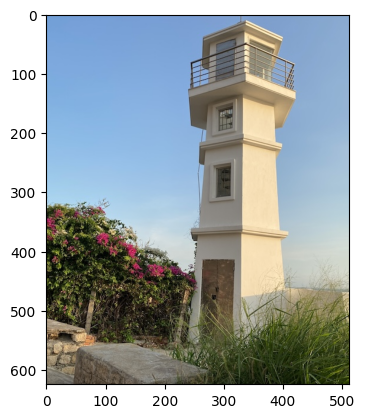

In [3]:
plt.imshow(ori_img)

# 1. Rotate

In [4]:
transform = A.Rotate(limit=15, p=1)
transform

Rotate(always_apply=False, p=1.0, limit=(-15, 15), interpolation=1, border_mode=4, value=None, mask_value=None, rotate_method='largest_box', crop_border=False)

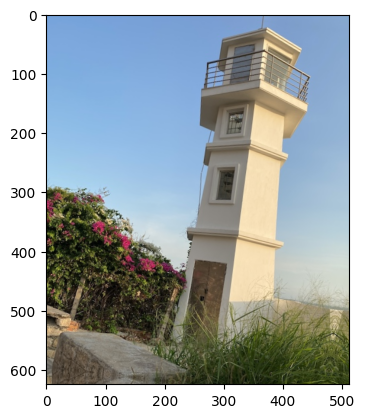

In [5]:
plt.imshow(transform(image=ori_img)['image'])

# 2. Flip

In [6]:
transform = A.HorizontalFlip(p=1)
transform

HorizontalFlip(always_apply=False, p=1.0)

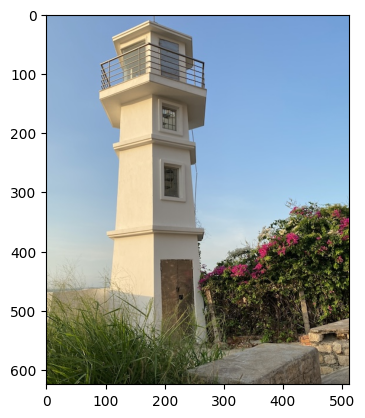

In [7]:
plt.imshow(transform(image=ori_img)['image'])

In [8]:
transform = A.VerticalFlip(p=1)
transform

VerticalFlip(always_apply=False, p=1.0)

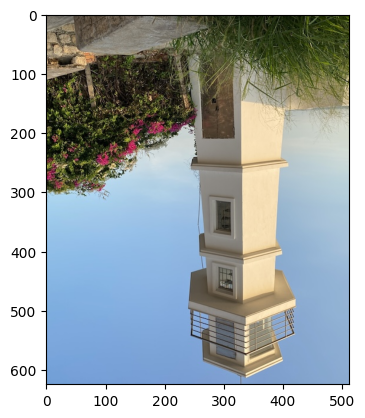

In [9]:
plt.imshow(transform(image=ori_img)['image'])

# 3. Resize

In [10]:
transform = A.Resize(height=128, width=128)
transform

Resize(always_apply=False, p=1.0, height=128, width=128, interpolation=1)

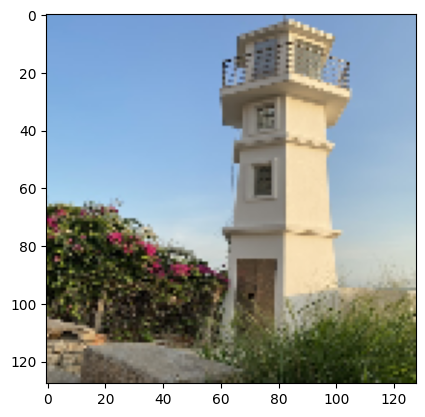

In [11]:
plt.imshow(transform(image=ori_img)['image'])

In [12]:
transform = A.Resize(height=128, width=256)
transform

Resize(always_apply=False, p=1.0, height=128, width=256, interpolation=1)

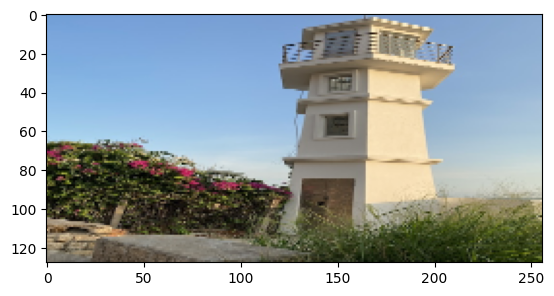

In [13]:
plt.imshow(transform(image=ori_img)['image'])

# 4. Crop

In [14]:
transform = A.RandomCrop(height=128, width=128)
transform

RandomCrop(always_apply=False, p=1.0, height=128, width=128)

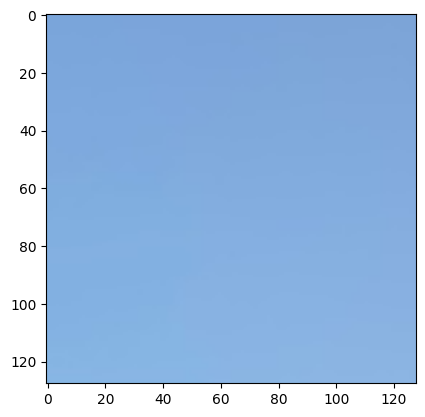

In [15]:
plt.imshow(transform(image=ori_img)['image'])

In [16]:
transform = A.RandomCrop(height=60, width=120)
transform

RandomCrop(always_apply=False, p=1.0, height=60, width=120)

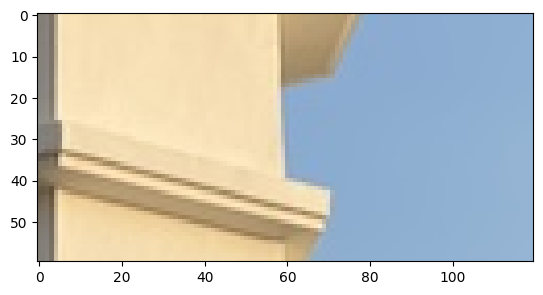

In [17]:
plt.imshow(transform(image=ori_img)['image'])

In [18]:
transform = A.CenterCrop(height=60, width=120)
transform

CenterCrop(always_apply=False, p=1.0, height=60, width=120)

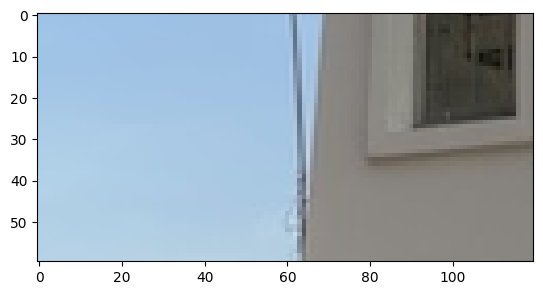

In [19]:
plt.imshow(transform(image=ori_img)['image'])

# 5. Brightness, contrast

In [20]:
transform = A.RandomBrightnessContrast(contrast_limit=0.7, p=1)
transform

RandomBrightnessContrast(always_apply=False, p=1.0, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.7, 0.7), brightness_by_max=True)

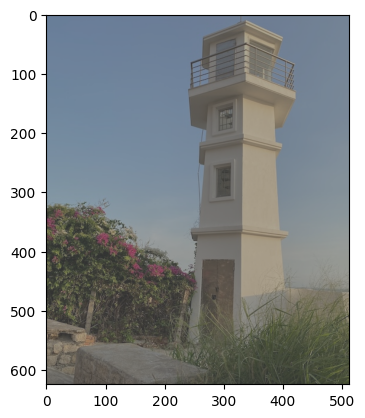

In [21]:
plt.imshow(transform(image=ori_img)['image'])

In [22]:
transform = A.RandomBrightnessContrast(brightness_limit=0.7, p=1)
transform

RandomBrightnessContrast(always_apply=False, p=1.0, brightness_limit=(-0.7, 0.7), contrast_limit=(-0.2, 0.2), brightness_by_max=True)

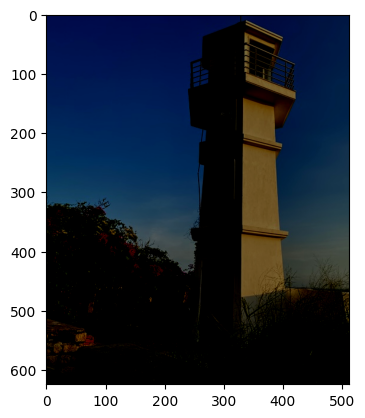

In [23]:
plt.imshow(transform(image=ori_img)['image'])

In [24]:
transform = A.RandomBrightnessContrast(brightness_limit=0.7, contrast_limit=0.7, p=1)
transform

RandomBrightnessContrast(always_apply=False, p=1.0, brightness_limit=(-0.7, 0.7), contrast_limit=(-0.7, 0.7), brightness_by_max=True)

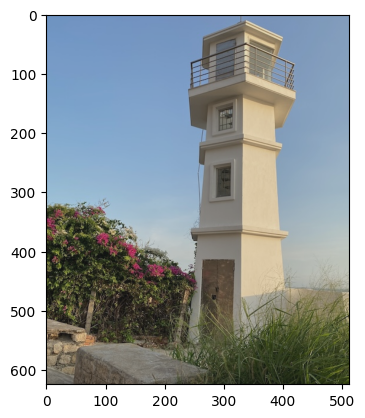

In [25]:
plt.imshow(transform(image=ori_img)['image'])

# 6. Blur

In [26]:
transform = A.Blur(blur_limit=11, p=1)
transform

Blur(always_apply=False, p=1.0, blur_limit=(3, 11))

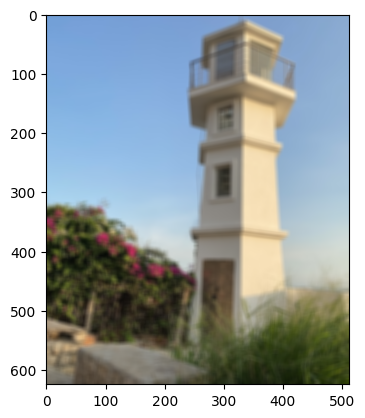

In [27]:
plt.imshow(transform(image=ori_img)['image'])

# 7. Compose

In [28]:
transform = A.Compose([
    A.Rotate(limit=15, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomCrop(height=224, width=224),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
])
transform

Compose([
  Rotate(always_apply=False, p=0.5, limit=(-15, 15), interpolation=1, border_mode=4, value=None, mask_value=None, rotate_method='largest_box', crop_border=False),
  HorizontalFlip(always_apply=False, p=0.5),
  RandomCrop(always_apply=False, p=1.0, height=224, width=224),
  RandomBrightnessContrast(always_apply=False, p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}, is_check_shapes=True)

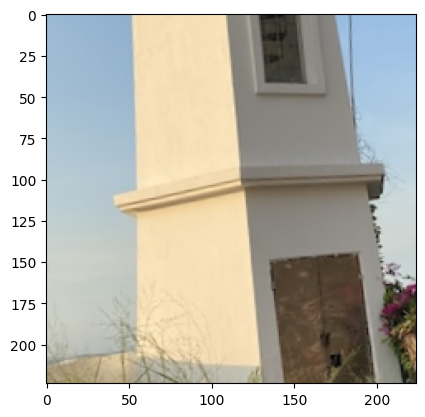

In [29]:
plt.imshow(transform(image=ori_img)['image'])

In [30]:
transform = A.Compose([
    A.Rotate(limit=15, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomCrop(height=224, width=224),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
transform

Compose([
  Rotate(always_apply=False, p=0.5, limit=(-15, 15), interpolation=1, border_mode=4, value=None, mask_value=None, rotate_method='largest_box', crop_border=False),
  HorizontalFlip(always_apply=False, p=0.5),
  RandomCrop(always_apply=False, p=1.0, height=224, width=224),
  RandomBrightnessContrast(always_apply=False, p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
  Normalize(always_apply=False, p=1.0, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0, normalization='standard'),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}, is_check_shapes=True)

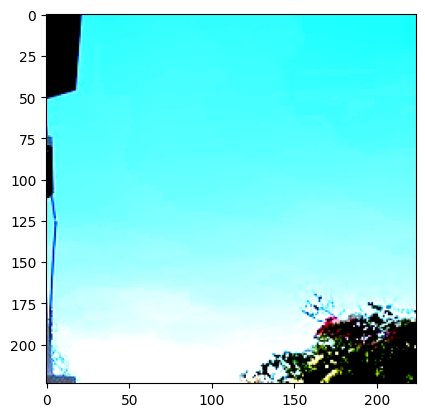

In [31]:
plt.imshow(transform(image=ori_img)['image'])

# 8. Augmentation with bbox

In [32]:
bbox_ori_img = ori_img.copy()
bbox = [240, 7, 425, 560, 'tower']

In [33]:
bbox_ori_img = cv2.rectangle(
    img=bbox_ori_img,
    pt1=(bbox[0], bbox[1]),
    pt2=(bbox[2], bbox[3]),
    color=(0, 255, 0),
    thickness=1
)

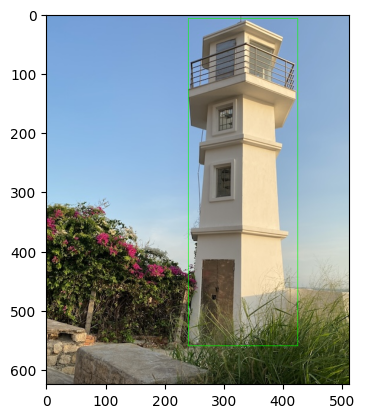

In [34]:
plt.imshow(bbox_ori_img)

In [35]:
transform = A.Compose([
    A.RandomCrop(width=250, height=250),
    A.HorizontalFlip(p=0.5),
], bbox_params=A.BboxParams(format='pascal_voc'))
transform

Compose([
  RandomCrop(always_apply=False, p=1.0, height=250, width=250),
  HorizontalFlip(always_apply=False, p=0.5),
], p=1.0, bbox_params={'format': 'pascal_voc', 'label_fields': None, 'min_area': 0.0, 'min_visibility': 0.0, 'min_width': 0.0, 'min_height': 0.0, 'check_each_transform': True, 'clip': False}, keypoint_params=None, additional_targets={}, is_check_shapes=True)

In [36]:
transformed_data = transform(image=ori_img, bboxes=[bbox])
transformed_data.keys()

dict_keys(['image', 'bboxes'])

In [37]:
transformed_img = transformed_data['image']
transformed_img

array([[[248, 225, 183],
        [247, 229, 193],
        [174, 158, 132],
        ...,
        [133, 180, 226],
        [133, 180, 226],
        [134, 181, 227]],

       [[247, 226, 183],
        [248, 229, 196],
        [174, 158, 133],
        ...,
        [133, 180, 226],
        [133, 180, 226],
        [134, 181, 227]],

       [[248, 227, 184],
        [248, 229, 196],
        [174, 160, 134],
        ...,
        [133, 180, 226],
        [133, 180, 226],
        [134, 181, 227]],

       ...,

       [[247, 224, 183],
        [250, 229, 186],
        [250, 229, 186],
        ...,
        [ 26,  35,  14],
        [ 26,  36,   9],
        [ 66,  78,  40]],

       [[247, 223, 185],
        [250, 229, 186],
        [250, 229, 186],
        ...,
        [ 20,  33,   7],
        [ 12,  23,   0],
        [ 61,  75,  26]],

       [[248, 224, 186],
        [249, 228, 185],
        [249, 228, 185],
        ...,
        [ 17,  27,   3],
        [ 28,  37,   6],
        [ 31,  43,   0]]

In [38]:
transformed_bboxes = transformed_data['bboxes']
transformed_bboxes

[(0.0, 0.0, 95.0, 250.0, 'tower')]

In [39]:
bbox_transformed_img = cv2.rectangle(
    img=transformed_img,
    pt1=(int(transformed_bboxes[0][0]), int(transformed_bboxes[0][1])),
    pt2=(int(transformed_bboxes[0][2]), int(transformed_bboxes[0][3])),
    color=(0, 255, 0),
    thickness=1
)

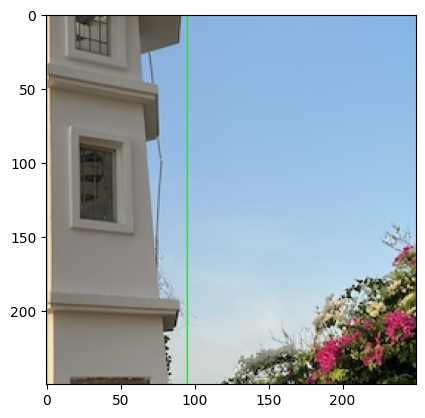

In [40]:
plt.imshow(bbox_transformed_img)